In [1]:
import pandas as pd

df = pd.read_csv("../flight/data/Clean_Dataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [2]:
df.airline.value_counts()
# 3enna 6 different airline

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [3]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [4]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [ ]:
# rah estaamil OneHotEncode la2an 3nde 3adad m3ayan men l cities w hek
# law ktar ma bestaamela

In [5]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [6]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [7]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [8]:
df["class"].value_counts()
# hon 3mlt class hek la2an hiye a python key fa ahsa ma ysir fi error

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [11]:
df["duration"].min()

np.float64(0.83)

In [10]:
df["duration"].max()

np.float64(49.83)

In [12]:
# we want to:
    #drop:
        # unnamed
        # flight
    #oneHotEncode:
        # airline
        # source_city
        # deparure_time
        # arrival_time
        # destination_city

    # numerical feature:
        # stops (from 0 to 2)

    # binary feature:
        # class


## Preprocessing

In [14]:
df = df.drop(["Unnamed: 0", "flight"], axis=1)

df["class"] = df["class"].apply(lambda x:1 if x == "Business" else 0)


In [19]:
pd.factorize(df.stops)

(array([0, 0, 0, ..., 1, 1, 1], shape=(300153,)),
 Index([0, 1, 2], dtype='int64'))

In [17]:
df.stops = pd.factorize(df.stops)[0]
# change text into numbers

In [18]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [25]:
pd.get_dummies(df.airline, prefix="airline").astype(int)

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
300148,0,0,0,0,0,1
300149,0,0,0,0,0,1
300150,0,0,0,0,0,1
300151,0,0,0,0,0,1


In [28]:
df = df.join(pd.get_dummies(df.airline, prefix="airline").astype(int)).drop("airline", axis=1)
#3meltelloun join ma3 l data ta3ite kella w mhit l column airline
df = df.join(pd.get_dummies(df.source_city, prefix="source").astype(int)).drop("source_city", axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix="dest").astype(int)).drop("destination_city", axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix="arrival").astype(int)).drop("arrival_time", axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix="departure").astype(int)).drop("departure_time", axis=1)




In [29]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Training Regression Model

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X, y = df.drop("price", axis=1), df.price



In [37]:
X

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [38]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# 20% for testing, 80% for training

In [40]:
reg = RandomForestRegressor(n_jobs=-1)
# n_jobs=-1 means the algorithm will use all the available gpu cores to train the module
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [41]:
reg.score(X_test, y_test)

0.9851673583702377

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

y_pred = reg.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9851673583702377
MAE: 1069.1557203672944
MSE: 7588019.811440615
RMSE: 2754.6360578923336


Text(0.5, 1.0, 'Prediction VS Actual Price')

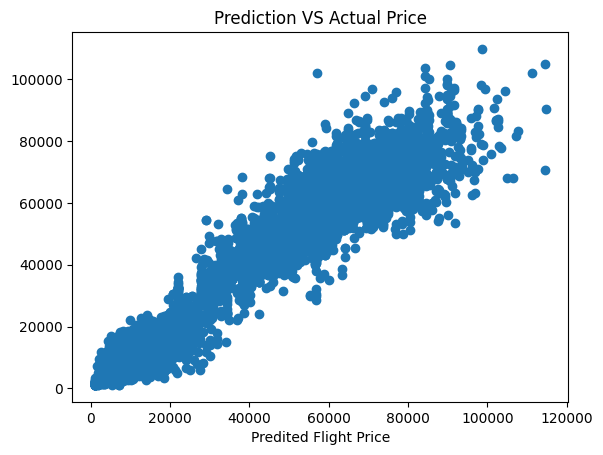

In [47]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Price")
plt.xlabel("Predited Flight Price")
plt.title("Prediction VS Actual Price")

In [48]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [49]:
"""
important_features_dict = {}
#emtpy dict

for idx, val in enumerate(reg.feature_importances_):
    # iterate over the feature important
    important_features_dict[idx] = val
    # we add that feature important to that dict

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
print(f"5 most important features: {important_features_list[:5]}")
""" 

5 most important features: [1, 2, 3, 5, 9]


In [50]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
# zip combines the featuresname and featureimportances into pairs
# [("Age", 0.3), ("Fare", 0.5), ("Embarked_C", 0.1), ("Embarked_Q", 0.1)]
# dict convert the zipped pairs into dict
sorted_importances = sorted(importances.items(), key= lambda x: x[1], reverse=True)
#sorts the dict item by importance(values) in descending order
# [("Age", 0.3), ("Fare", 0.5), ("Embarked_C", 0.1), ("Embarked_Q", 0.1)]
# [("Fare", 0.5), ("Age", 0.3), ("Embarked_C", 0.1), ("Embarked_Q", 0.1)]
# Look at the second element x[1] in each tuple to decide the order


sorted_importances

[('class', np.float64(0.8801019903099373)),
 ('duration', np.float64(0.05713870965636365)),
 ('days_left', np.float64(0.01861886136772765)),
 ('airline_Air_India', np.float64(0.00521352189484771)),
 ('airline_Vistara', np.float64(0.0048147714815868214)),
 ('source_Delhi', np.float64(0.003871896000636322)),
 ('dest_Delhi', np.float64(0.003508548978309763)),
 ('source_Mumbai', np.float64(0.002268136135705078)),
 ('dest_Kolkata', np.float64(0.0018578816732040654)),
 ('stops', np.float64(0.0018253238825019203)),
 ('dest_Mumbai', np.float64(0.0018052732186820764)),
 ('source_Kolkata', np.float64(0.0017124261014989082)),
 ('dest_Hyderabad', np.float64(0.0016189278418840389)),
 ('arrival_Evening', np.float64(0.0014391548569257311)),
 ('source_Hyderabad', np.float64(0.0013712510024686195)),
 ('arrival_Night', np.float64(0.0011465561781992962)),
 ('departure_Evening', np.float64(0.001135971426037273)),
 ('dest_Bangalore', np.float64(0.0011094622830810838)),
 ('source_Bangalore', np.float64(0.00

In [51]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

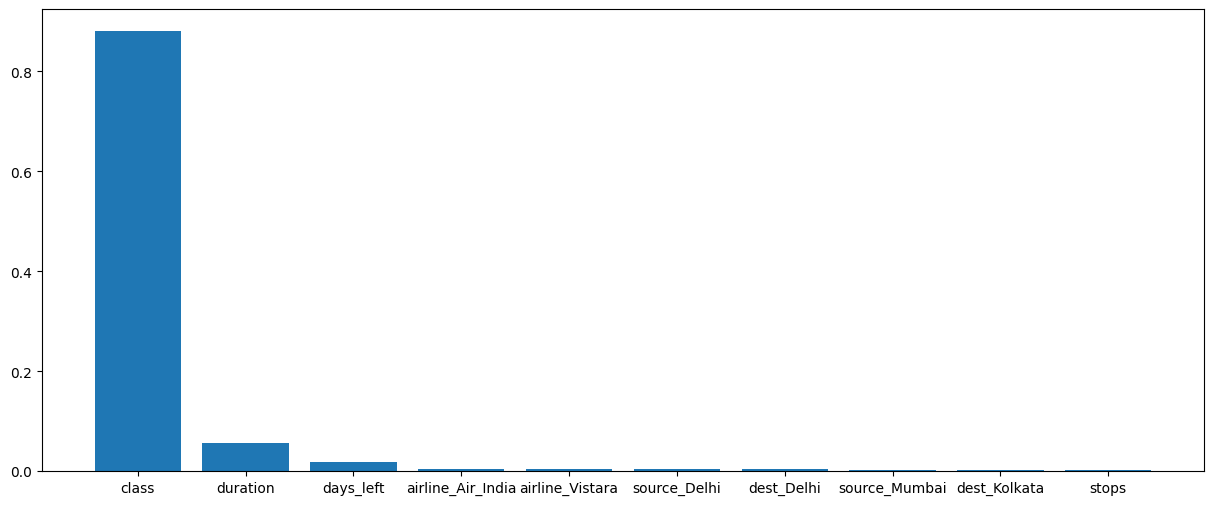

In [54]:
plt.figure(figsize=(15, 6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

Hyperparameter


In [ ]:
from sklearn.model_selection import GridSearchCV

# Param 1: A, B, C
# param 2: X, Y, Z

#i have to try AX, AY, AZ, BX, BY, BZ, CX, CY, CZ

reg = RandomForestRegressor(n_jobs=-1)
param_grid = {
    'n_estimators': [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt"]
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1,5),
    "max_features": [1.0, "auto", "sqrt"]
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring="neg_mean_squared_error", verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)
best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


c:\Users\tmakh\OneDrive\Desktop\AI_Lara_Wehbe\python\testenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tmakh\OneDrive\Desktop\AI_Lara_Wehbe\python\testenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tmakh\OneDrive\Desktop\AI_Lara_Wehbe\python\testenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\tmakh\OneDrive\Desktop\AI_Lara_Wehbe\python\testenv\Lib\site-pac

In [56]:
best_regressor.score(X_test, y_test)

0.9862860244518747

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

y_pred = best_regressor.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9862860244518747
MAE: 1077.5558195590954
MSE: 7015737.368317636
RMSE: 2648.723724422318


Text(0.5, 1.0, 'Prediction VS Actual Price')

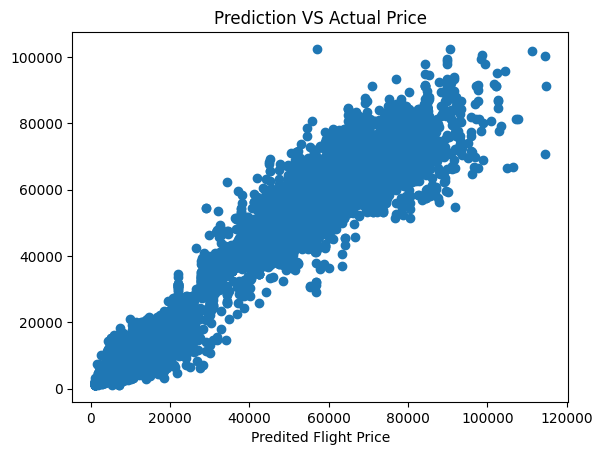

In [58]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Price")
plt.xlabel("Predited Flight Price")
plt.title("Prediction VS Actual Price")